# Compyter Vision

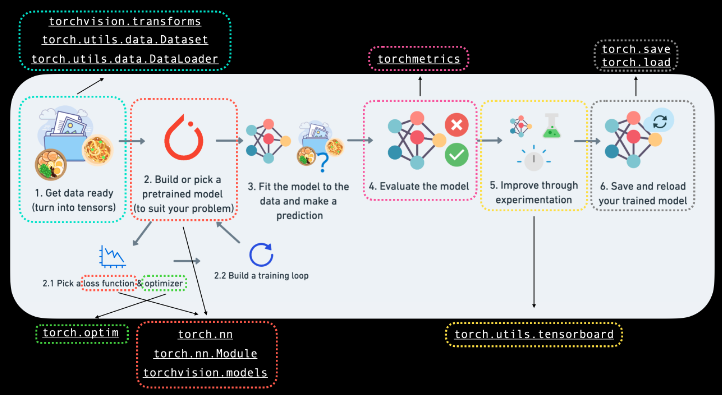

## [torchvision Module](https://pytorch.org/vision/stable/index.html)

[torchvision.datasets](https://pytorch.org/vision/stable/datasets.html)
> many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more.
  - [making custom datasets](https://pytorch.org/vision/stable/datasets.html#base-classes-for-custom-datasets)

[torchvision.models](https://pytorch.org/vision/stable/models.html)
> well-performing and commonly used computer vision model architectures implemented in PyTorch

[torchvision.transforms](https://pytorch.org/vision/stable/transforms.html)
> Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here

[torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html#module-torch.utils.data)
> Creates a Python iteralbe over a dataset 

## Import Module

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision 
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check versions
# Note: your PyTorch version shouldn't be lower than 1.10.0 and torchvision version shouldn't be lower than 0.11
print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"

PyTorch version: 1.13.1+cu116
torchvision version: 0.14.1+cu116


In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torchinfo

In [ ]:
import os, random
import numpy as np 
import pandas as pd 

SEED = 42

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)    # 파이썬 환경변수 시드 고정
    np.random.seed(seed)
    torch.manual_seed(seed) # cpu 연산 무작위 고정
    torch.cuda.manual_seed(seed) # gpu 연산 무작위 고정
    torch.backends.cudnn.deterministic = True  # cuda 라이브러리에서 Deterministic(결정론적)으로 예측하기 (예측에 대한 불확실성 제거 )

reset_seeds(SEED)

## Getting a dataset

- [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist)
> Except it contains grayscale images of 10 different kinds of clothing.

- [torchvision.datasets.FashionMNIST()](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html)  
To download it, we provide the fillowing parameters:
  - `root: str` which folder do you want to dwonload the data to?
  - `train: Bool` do you want the training or test split? 
  - `download: Bool` should the data be downloaded? 
  - `transform: torchvision.transforms` what transformations would you like to do on the data?

In [ ]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
# See first training sample
image, label = train_data[0]

In [ ]:
# [color_channels=1, height=28, width=28]
image.shape

torch.Size([1, 28, 28])

### Data Channels

The order of our current tensor is often referred to as `CHW`(Color Channels, Height, Width).  
> If you have a `batch_size=32`, your tensor shape may be `[batch_size=32, color_channels=1,height=28, width=28]`. 
> So you will see `NCHW` (batch size, color channels, height, width)

If `color_channels=3`, the image comes in pixel values for red, green and blue(this is also known a the [RGB color model](https://en.wikipedia.org/wiki/RGB_color_model)). 

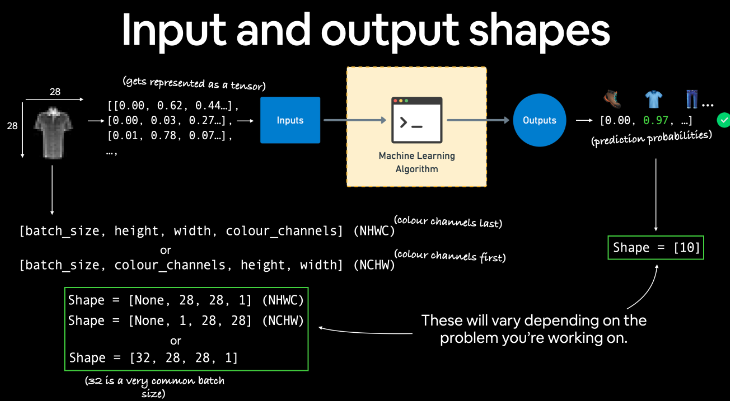

### EDA 

In [ ]:
# How many samples are there? 
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [ ]:
# See classes
class_names = train_data.classes
class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Image shape: torch.Size([1, 28, 28])


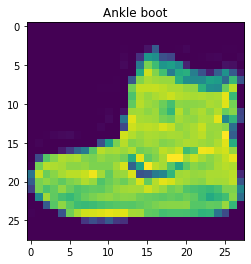

In [ ]:
import matplotlib.pyplot as plt

image, label = train_data[0]
print(f"Image shape: {image.shape}")
# (colour channels, height, width) -> (height, width)
plt.imshow(image.squeeze()) 
plt.title(class_names[label]);

In [ ]:
image.squeeze().shape, image.shape

(torch.Size([28, 28]), torch.Size([1, 28, 28]))

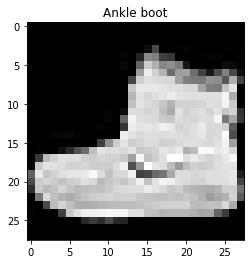

In [ ]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);

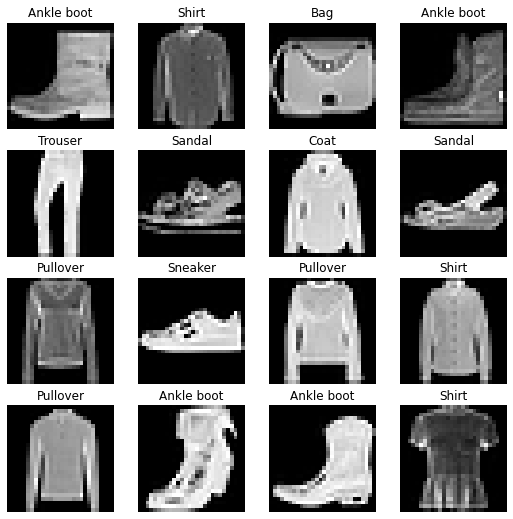

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## Prepare DataLoader

It turns a large `Dataset` into a Python iterable of smaller chunks. These smaller chunks are called batches or mini-batches and can be set by the `batch_size` parameter.  

What's a good batch size?  
`32 is a good place to start` for a fair amount of problems. But since this is a value you can set (a hyperparameter) you can try all different kinds of values, though generally powers of 2 are used most often (e.g. 32, 64, 128, 256, 512) 


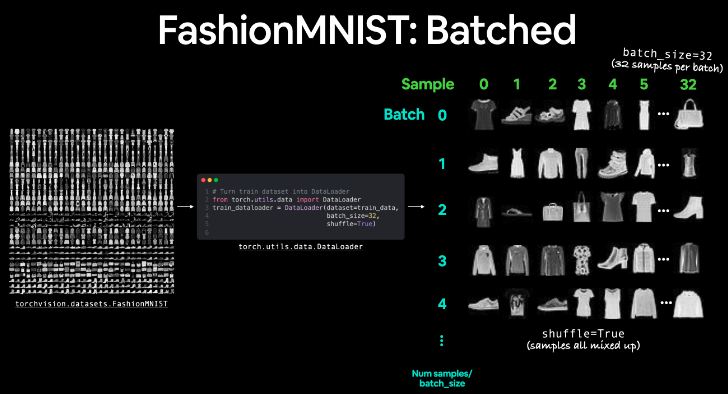

In [ ]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7f2d6d1619a0>, <torch.utils.data.dataloader.DataLoader object at 0x7f2d6d161940>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


### Check out data inside dataloader

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

# shape: [batch_size=32, color_channels=1,height=28, width=28]
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


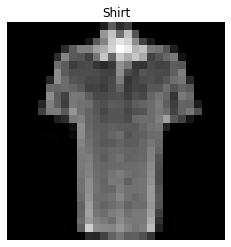

In [ ]:
# Show a sample
torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis("Off");

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 1.Baseline Model

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
train_input = train_features_batch[0]

# Flatten the sample
flatten_output = flatten_model(train_input) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {train_input.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {flatten_output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
# Create a linear layer
linear_model = nn.Linear(in_features=784, out_features=10)

linear_output = linear_model(flatten_output)

print(f"Shape before linear: {flatten_output.shape} -> [color_channels, height*width]")
print(f"Shape after linear: {linear_output.shape} -> [color_channels, 10]")

Shape before linear: torch.Size([1, 784]) -> [color_channels, height*width]
Shape after linear: torch.Size([1, 10]) -> [color_channels, 10]


### Build a baseline model

In [ ]:
from torch import nn

class BaselineModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # [color_channels, height, width] -> [color_channels, height * width]
            nn.Linear(in_features=input_shape, out_features=hidden_units), # [color_channels, height * width] -> [color_channels, hidden_units]
            nn.Linear(in_features=hidden_units, out_features=output_shape) # [color_channels, hidden_units] -> [color_channels, output_shape]
        )
    
    def forward(self, x):
        return self.layer_stack(x) # [color_channels, height, width] -> [color_channels, output_shape]

In [ ]:
torch.manual_seed(SEED)

# Need to setup model with input parameters
baseline_model = BaselineModel(input_shape=784, # one for every pixel (28x28)
    hidden_units=10, # how many units in the hiden layer
    output_shape=len(class_names) # one for every class
)
baseline_model.to(device) # keep model on CPU to begin with 

BaselineModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
torchinfo.summary(baseline_model,(32, 1, 28, 28)) # [batch_size, color_channels, height, width]

Layer (type:depth-idx)                   Output Shape              Param #
BaselineModel                            [32, 10]                  --
├─Sequential: 1-1                        [32, 10]                  --
│    └─Flatten: 2-1                      [32, 784]                 --
│    └─Linear: 2-2                       [32, 10]                  7,850
│    └─Linear: 2-3                       [32, 10]                  110
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.14

### Setup loss, optimizer and evaluation metrics

In [ ]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy()

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=baseline_model.parameters(), lr=0.1)

### Creating a function to time our experiments

In [ ]:
from timeit import default_timer as timer 

def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format). 
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

### Creating a training loop and training a model on batches of data
1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calcuate the test loss per batch
4. Print out what's happening
5. Time it all

#### [optimizer.zero_grad(), loss.backward(), optimizer.step()](https://gaussian37.github.io/dl-pytorch-snippets/#optimizerzero_grad-lossbackward-optimizerstep-1)
- `optimizer.zero_grad()`
> 이전 step에서 각 layer 별로 계산된 gradient 값을 모두 0으로 기화 시키는 작업이다. 0으로 초기화 하지 않으면 이전 step의 결과에 현재 step의 gradient 누적으로 합해져서 계산되어 집니다.   
- `loss.backward()`
> 각 layer의 파라미터에 대하여 back-propagation을 통해 gradient를 계산합니다.   
- `optimizer.step()`
> 각 layer의 파라미터와 같이 저장된 gradient 값을 이용하여 파라미터를 업데이트 합니다. 이 명령어를 통해 파라미터가 업데이트되어 모델의 성능이 개선됩니다.

#### training and testing

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 3

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        baseline_model.train() 
        # 1. Forward pass
        y_pred = baseline_model(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)
    
    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy 
    test_loss, test_acc = 0, 0 
    baseline_model.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = baseline_model(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time      
train_time_end_on_cpu = timer()
total_train_time_baseline_model = print_train_time(start=train_time_start_on_cpu, 
                                                    end=train_time_end_on_cpu,
                                                    device=str(next(baseline_model.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04%

Epoch: 1
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20%

Epoch: 2
-------
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43%

Train time on cpu: 51.481 seconds


### Make predictions and get baseline model results

In [ ]:
torch.manual_seed(SEED)

def eval_model(model: torch.nn.Module, 
                data_loader: torch.utils.data.DataLoader, 
                loss_fn: torch.nn.Module, 
                accuracy_fn, 
                device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [ ]:

# Calculate baseline model results on test dataset
baseline_model_results = eval_model(model=baseline_model, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
baseline_model_results

{'model_name': 'BaselineModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 2.Non Linear Model

### Build a better model with non-linearity
We'll do a similar model to before, except this time we'll put non-linear functions(`nn.ReLU()`) in between each linear layer.  

In [ ]:
# Create a model with non-linear and linear layers
class NonLinearModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(), # activate function
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU() # activate function
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)

In [ ]:
torch.manual_seed(SEED)

non_linear_model = NonLinearModel(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available

In [ ]:
next(non_linear_model.parameters()).device # check model device

device(type='cpu')

In [ ]:
non_linear_model

NonLinearModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

아래 summary를 보면 baseline_model과 non_linear_model의 Total params를 보면 같은 것을 알 수 있다.   
즉, Activate Function(ReLU)는 파라미터 양을 증가 또는 감소시키는 역할을 하지 않는다는 것을 확인할 수 있다.    

일반적으로 파라미터 양이 증가하면 평가지표는 높아질 수 있지만, 모델의 학습량이 증가하는 단점이 있다. 

In [ ]:
# non linear model
torchinfo.summary(non_linear_model,(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
NonLinearModel                           [32, 10]                  --
├─Sequential: 1-1                        [32, 10]                  --
│    └─Flatten: 2-1                      [32, 784]                 --
│    └─Linear: 2-2                       [32, 10]                  7,850
│    └─ReLU: 2-3                         [32, 10]                  --
│    └─Linear: 2-4                       [32, 10]                  110
│    └─ReLU: 2-5                         [32, 10]                  --
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.14

In [ ]:
# baseline model
torchinfo.summary(baseline_model,(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
BaselineModel                            [32, 10]                  --
├─Sequential: 1-1                        [32, 10]                  --
│    └─Flatten: 2-1                      [32, 784]                 --
│    └─Linear: 2-2                       [32, 10]                  7,850
│    └─Linear: 2-3                       [32, 10]                  110
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.14

### Setup loss, optimizer and evaluation metrics

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=non_linear_model.parameters(), 
                            lr=0.1)

In [ ]:
def train_step(model: torch.nn.Module,
                data_loader: torch.utils.data.DataLoader,
                loss_fn: torch.nn.Module,
                optimizer: torch.optim.Optimizer,
                accuracy_fn,
                device: torch.device = device):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

In [ ]:
def test_step(data_loader: torch.utils.data.DataLoader,
                model: torch.nn.Module,
                loss_fn: torch.nn.Module,
                accuracy_fn,
                device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

#### training and testing

In [ ]:
torch.manual_seed(SEED)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=non_linear_model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=non_linear_model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_non_linear_model = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.09199 | Train accuracy: 61.34%
Test loss: 0.95636 | Test accuracy: 65.00%

Epoch: 1
---------
Train loss: 0.78101 | Train accuracy: 71.93%
Test loss: 0.72227 | Test accuracy: 73.91%

Epoch: 2
---------
Train loss: 0.67027 | Train accuracy: 75.94%
Test loss: 0.68500 | Test accuracy: 75.02%

Train time on cpu: 39.211 seconds


### Evaluate trained Model

In [ ]:
torch.manual_seed(SEED)

# Note: This will error due to `eval_model()` not using device agnostic code 
non_linear_model_results = eval_model(
    model=non_linear_model, 
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn) 

non_linear_model_results 

{'model_name': 'NonLinearModel',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
baseline_model_results

{'model_name': 'BaselineModel',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In this case, it looks like adding non-linearities to our model made it perform worse than the baseline.  
That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.  

From the looks of things, it seems like our model is `overfitting` on the training data.  
Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.  

Two of the main to fix overfitting include:
1. Using a smaller or different model 
> some models fit certain kinds of data better than others.  
2. Using a larger dataset  
> the more data, the more chance a model has to learn generalizabel patterns.  

## 3.[CNN Model](https://poloclub.github.io/cnn-explainer/)

[nn.Conv2d(in_channels, out_channels, kernel_size)](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html)  
- `stride`: controls the stride for the cross-correlation, a single number or a tuple.
- `padding`: controls the amount of padding applied to the input. 
- `dilation`: controls the spacing between the kernel points


In [ ]:
# With square kernels and equal stride
m = nn.Conv2d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50, 100)
m(input).shape

torch.Size([20, 33, 24, 49])

In [ ]:
# non-square kernels and unequal stride and with padding and dilation
m = nn.Conv2d(16, 33, (3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
m(input).shape

torch.Size([20, 33, 26, 100])

[nn.MaxPool2d()](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html)
- `kernel_size`: the size of the window to take a max over 
- `stride`: the stride of the window. Default value is `kernel_size` 

In [ ]:
# pool of square window of size=3, stride=2
m = nn.MaxPool2d(3, stride=2)
input = torch.randn(20, 16, 50, 32)
m(input).shape

torch.Size([20, 16, 24, 15])

In [ ]:
# pool of non-square window
m = nn.MaxPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
m(input).shape

torch.Size([20, 16, 24, 31])

### Build CNN Model

In [ ]:
# Create a convolutional neural network 
class CNNModel(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                    out_channels=hidden_units, 
                    kernel_size=3, # how big is the square that's going over the image?
                    stride=1, # default
                    padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                        stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                        out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [ ]:
torch.manual_seed(SEED)

cnn_model = CNNModel(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)

cnn_model

CNNModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

아래 summary를 보면 cnn model의 파라미터양이 더 적은 것을 알 수 있다.   
이것을 통해 nn.Linear보다 nn.Conv2d의 모델 학습량이 훨씬 더 적다는 것을 알 수 있다.    

In [ ]:
# cnn model
torchinfo.summary(cnn_model,(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
CNNModel                                 [32, 10]                  --
├─Sequential: 1-1                        [32, 10, 14, 14]          --
│    └─Conv2d: 2-1                       [32, 10, 28, 28]          100
│    └─ReLU: 2-2                         [32, 10, 28, 28]          --
│    └─Conv2d: 2-3                       [32, 10, 28, 28]          910
│    └─ReLU: 2-4                         [32, 10, 28, 28]          --
│    └─MaxPool2d: 2-5                    [32, 10, 14, 14]          --
├─Sequential: 1-2                        [32, 10, 7, 7]            --
│    └─Conv2d: 2-6                       [32, 10, 14, 14]          910
│    └─ReLU: 2-7                         [32, 10, 14, 14]          --
│    └─Conv2d: 2-8                       [32, 10, 14, 14]          910
│    └─ReLU: 2-9                         [32, 10, 14, 14]          --
│    └─MaxPool2d: 2-10                   [32, 10, 7, 7]            --
├─Sequentia

In [ ]:
# non linear model
torchinfo.summary(non_linear_model,(32, 1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
NonLinearModel                           [32, 10]                  --
├─Sequential: 1-1                        [32, 10]                  --
│    └─Flatten: 2-1                      [32, 784]                 --
│    └─Linear: 2-2                       [32, 10]                  7,850
│    └─ReLU: 2-3                         [32, 10]                  --
│    └─Linear: 2-4                       [32, 10]                  110
│    └─ReLU: 2-5                         [32, 10]                  --
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.01
Params size (MB): 0.03
Estimated Total Size (MB): 0.14

### Stepping through training of CNN Model

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

In [ ]:
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
input_shape = 1
hidden_units = 10

block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                    out_channels=hidden_units, 
                    kernel_size=3, # how big is the square that's going over the image?
                    stride=1, # default
                    padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                    stride=2) # default stride value is same as kernel_size
        )

In [ ]:
# x = self.block_1(x)
block_1_out = block_1(train_features_batch)
block_1_out.shape

torch.Size([32, 10, 14, 14])

In [ ]:
block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

In [ ]:
# x = self.block_2(x)
block_2_out = block_2(block_1_out)
block_2_out.shape 

torch.Size([32, 10, 7, 7])

In [ ]:
output_shape = len(class_names)

classifier = nn.Sequential(
                nn.Flatten(),
                # Where did this in_features shape come from? 
                # It's because each layer of our network compresses and changes the shape of our inputs data.
                nn.Linear(in_features=hidden_units*7*7, 
                        out_features=output_shape)
            )

In [ ]:
# x = self.classifier(x)
out = classifier(block_2_out)
out.shape 

torch.Size([32, 10])

### Setup a loss function and optimizer

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=cnn_model.parameters(), 
                            lr=0.1)

In [ ]:
torch.manual_seed(SEED)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=cnn_model, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=cnn_model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_cnn_model = print_train_time(start=train_time_start_model_2,
                                                end=train_time_end_model_2,
                                                device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.59518 | Train accuracy: 78.38%
Test loss: 0.39500 | Test accuracy: 85.99%

Epoch: 1
---------
Train loss: 0.36536 | Train accuracy: 86.90%
Test loss: 0.35244 | Test accuracy: 86.91%

Epoch: 2
---------
Train loss: 0.32588 | Train accuracy: 88.13%
Test loss: 0.32719 | Test accuracy: 88.07%

Train time on cpu: 159.204 seconds


### Evaluate trained Model

In [ ]:
# Get cnn_model results 
cnn_model_results = eval_model(
    model=cnn_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

cnn_model_results

{'model_name': 'CNNModel',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 4.Compare model results and training time

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([baseline_model_results, non_linear_model_results, cnn_model_results])
compare_results

,model_name,model_loss,model_acc
0,BaselineModel,0.476639,83.426518
1,NonLinearModel,0.685001,75.019968
2,CNNModel,0.327190,88.069089


In [ ]:
# Add training times to results comparison
compare_results["training_time"] = [total_train_time_baseline_model,
                                    total_train_time_non_linear_model,
                                    total_train_time_cnn_model]
compare_results

,model_name,model_loss,model_acc,training_time
0,BaselineModel,0.476639,83.426518,51.481352
1,NonLinearModel,0.685001,75.019968,39.210934
2,CNNModel,0.327190,88.069089,159.203584


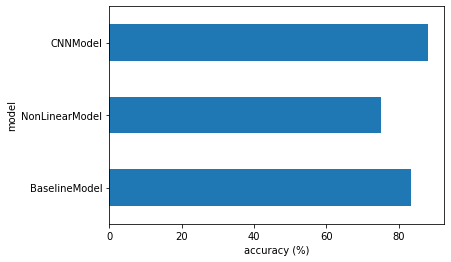

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 5.Make and evaluate random predictions with best model

Alright, we've compared our moels to each other, let's further evaluate our best performing mode, `CNN Model`.  
  
To do so, let's create a function `make_predictions()` where we can pass the model and some data for it to predict on.  

In [ ]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())
            
    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [ ]:
import random

random.seed(SEED)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=cnn_model, 
                            data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
print(f'before: {pred_probs.shape}')
pred_classes = pred_probs.argmax(dim=1)
print(f'after: {pred_classes.shape}')
pred_classes

before: torch.Size([9, 10])
after: torch.Size([9])


tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

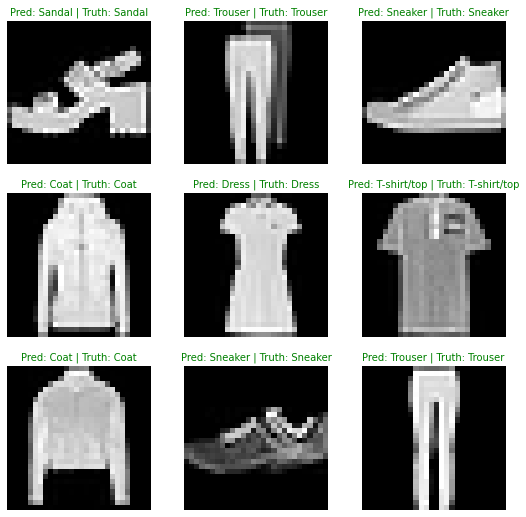

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
    # Create a subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction label (in text form, e.g. "Sandal")
    pred_label = class_names[pred_classes[i]]

    # Get the truth label (in text form, e.g. "T-shirt")
    truth_label = class_names[test_labels[i]] 

    # Create the title text of the plot
    title_text = f"Pred: {pred_label} | Truth: {truth_label}"

    # Check for equality and change title colour accordingly
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False);

## 6.Making a confusion matrix for further prediction evaluation
To make a confusion matrix, we'll go through three steps:
1. Make predictions with our trained model, `cnn_model` 
2. Make a confusion matrix using [torch.ConfusionMatrix](https://torchmetrics.readthedocs.io/en/stable/).
3. Plot the confusion matrix using [mlxtend.plotting.plot_confusion_matrix()](https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/).  


In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
cnn_model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = cnn_model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 518.6/518.6 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.2 MB/s eta 0:00:00
mlxtend version: 0.21.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.21.0


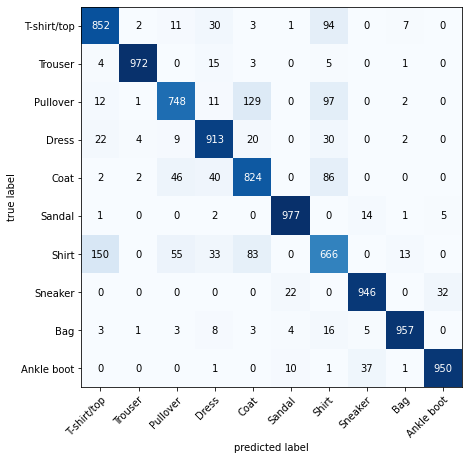

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                        target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## [7.Save and load best performing model](https://pytorch.org/tutorials/beginner/saving_loading_models.html)
- `torch.save`: a function to save a whole Pytorch model or a model's `state_dict()`.
- `torch.load`: a function to load in a saved Pytorch object. 
- `torch.nn.Module.load_state_dict()`: a function to load a saved `state_dict()` into an existing model instance. 

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "cnn_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=cnn_model.state_dict(), # only saving the state_dict() only saves the learned parameters
            f=MODEL_SAVE_PATH)

Saving model to: models/cnn_model.pth


In [ ]:
# Create a new instance of CNNModel (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model = CNNModel(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model = loaded_model.to(device)

In [ ]:
# Evaluate loaded model
torch.manual_seed(SEED)

loaded_model_results = eval_model(
    model=loaded_model,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_results

{'model_name': 'CNNModel',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}